In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
import seaborn as sns 


In [2]:
df = pd.read_excel("./p1-customers.xlsx")

In [3]:
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [5]:
df.shape

(2375, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df['Customer_Segment'].value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

In [8]:
df['City'].unique(), df['City'].nunique()

(array(['Denver', 'Greenwood Village', 'Centennial', 'Lakewood', 'Arvada',
        'Broomfield', 'Aurora', 'Englewood', 'Westminster', 'Northglenn',
        'Littleton', 'Parker', 'Superior', 'Thornton', 'Brighton',
        'Golden', 'Wheat Ridge', 'Castle Pines', 'Highlands Ranch',
        'Edgewater', 'Commerce City', 'Boulder', 'Morrison', 'Lafayette',
        'Louisville', 'Henderson', 'Lone Tree'], dtype=object),
 27)

In [9]:
len(df['Store_Number'].unique())

10

In [10]:
df['City'].value_counts()

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Castle Pines           2
Brighton               2
Lone Tree              1
Henderson              1
Name: City, dtype: int64

In [11]:
df1 = df.copy()
df1.drop(['Name','Address', 'State','ZIP', 'Customer_ID','City', 'Responded_to_Last_Catalog'], axis = 1, inplace= True)
df1.head()

,Customer_Segment,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Store Mailing List,227.90,100,1,6
1,Store Mailing List,55.00,105,1,6
2,Store Mailing List,212.57,101,1,3
3,Store Mailing List,195.31,105,1,6
4,Store Mailing List,110.55,100,1,2


Text(0.5, 1.0, 'The Number of Customers in Each Segment')

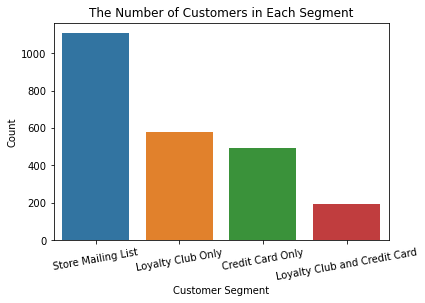

In [12]:
stage_order = df1['Customer_Segment'].value_counts().index
sns.countplot(data = df1, x = 'Customer_Segment', order = stage_order)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation =10)
plt.title('The Number of Customers in Each Segment')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Store Mailing List'),
  Text(1, 0, 'Loyalty Club Only'),
  Text(2, 0, 'Credit Card Only'),
  Text(3, 0, 'Loyalty Club and Credit Card')])

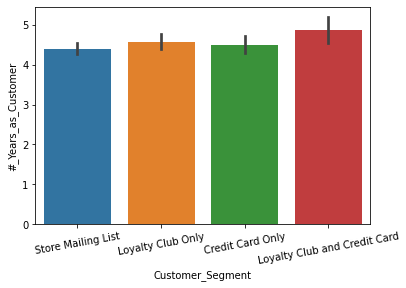

In [13]:
segment_order = df1['Customer_Segment'].value_counts().index
sns.barplot(data = df1, x = 'Customer_Segment', y = '#_Years_as_Customer', order = segment_order)
plt.xticks(rotation =10)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Store Mailing List'),
  Text(1, 0, 'Loyalty Club Only'),
  Text(2, 0, 'Credit Card Only'),
  Text(3, 0, 'Loyalty Club and Credit Card')])

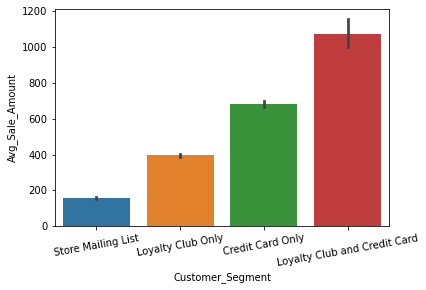

In [14]:
sns.barplot(data = df1, x = 'Customer_Segment', y = 'Avg_Sale_Amount', order = segment_order)
plt.xticks(rotation =10)

<AxesSubplot:xlabel='Store_Number', ylabel='Avg_Sale_Amount'>

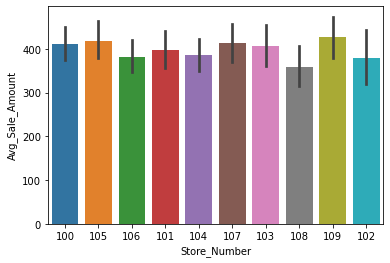

In [15]:
store_order= df1['Store_Number'].value_counts().index
sns.barplot(data = df1, x = 'Store_Number', y = 'Avg_Sale_Amount' , order = store_order)

Text(0, 0.5, 'Average Sales Amount')

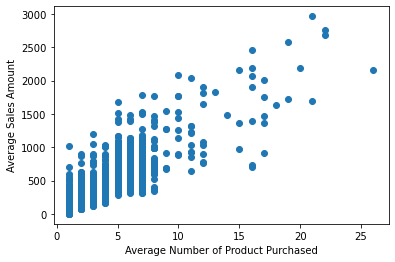

In [16]:
plt.scatter(data = df, x = 'Avg_Num_Products_Purchased', y = 'Avg_Sale_Amount')
plt.xlabel('Average Number of Product Purchased')
plt.ylabel('Average Sales Amount')

In [17]:
df2=pd.get_dummies(df1, drop_first = True)
df2.head()

,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,227.90,100,1,6,0,0,1
1,55.00,105,1,6,0,0,1
2,212.57,101,1,3,0,0,1
3,195.31,105,1,6,0,0,1
4,110.55,100,1,2,0,0,1


In [18]:
target = df2['Avg_Sale_Amount']
predictors= df2.drop(['Avg_Sale_Amount'],axis =1)
predictor = sm.add_constant(predictors)
model = sm.OLS(target,predictor).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     2030.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        23:07:51   Log-Likelihood:                -15058.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2368   BIC:                         3.017e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           431.8525    104.960      4.114      0.000     226.029     637.676
Store_Number                                     -1.1268      0.995     -1.132      0.258      -3.078       0.825
Avg_Num_Products_Purchased                       66.9587      1.515     44.192      0.000      63.987      69.930
#_Years_as_Customer                              -2.3527      1.223     -1.924      0.054      -4.751       0.045
Customer_Segment_Loyalty Club Only             -149.5398      8.976    -16.659      0.000    -167.142    -131.938
Customer_Segment_Loyalty Club and Credit Card   282.6100     11.909     23.730      0.000     259.256     305.964
Customer_Segment_Store Mailing List            -245.9219      9.769    -25.173      0.000    -265.079    -226.764
==============================================================================
Omnibus:                      359.686   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.525
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     3.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
pred = sm.add_constant(df2.drop(['Avg_Sale_Amount','Store_Number','#_Years_as_Customer'],axis =1))
model1 = sm.OLS(target,pred).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        23:07:51   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           303.4635     10.576     28.694      0.000     282.725     324.202
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
Customer_Segment_Loyalty Club Only             -149.3557      8.973    -16.645      0.000    -166.951    -131.760
Customer_Segment_Loyalty Club and Credit Card   281.8388     11.910     23.664      0.000     258.484     305.194
Customer_Segment_Store Mailing List            -245.4177      9.768    -25.125      0.000    -264.572    -226.263
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
df3 = df2.drop(['Avg_Sale_Amount','Store_Number','#_Years_as_Customer'],axis =1)
reg = LinearRegression()
reg.fit(df3, target)

LinearRegression()

In [23]:
y = reg.predict(df3)


In [22]:
reg.intercept_, reg.coef_, reg.score(df3, target)

(303.4634713146726,
 array([  66.97620492, -149.35572194,  281.83876492, -245.4177445 ]),
 0.8368777093556734)

In [24]:
test_d = pd.read_excel('./p1-mailinglist.xlsx')

In [26]:
len(test_d)

250

In [27]:
data = test_d.drop(['Name','Customer_ID','Address','State','City','ZIP','Store_Number', '#_Years_as_Customer'], axis = 1)

In [28]:
d = data.copy()
d1 = d.drop(['Score_No', 'Score_Yes'], axis=1)
d1=pd.get_dummies(d1, drop_first = True)

In [29]:
data['Predicted_Revenue'] = reg.predict(d1)

In [30]:
data['Expected_Revenue'] = data['Predicted_Revenue']*data['Score_Yes']

In [32]:
data.head()

,Customer_Segment,Avg_Num_Products_Purchased,Score_No,Score_Yes,Predicted_Revenue,Expected_Revenue
0,Loyalty Club Only,3,0.694964,0.305036,355.036364,108.298804
1,Loyalty Club and Credit Card,6,0.527275,0.472725,987.159466,466.654501
2,Loyalty Club Only,7,0.421118,0.578882,622.941184,360.609345
3,Loyalty Club Only,2,0.694862,0.305138,288.060159,87.898046
4,Loyalty Club Only,4,0.612294,0.387706,422.012569,163.616744


In [33]:
total_exp_rev=data['Expected_Revenue'].sum()
total_exp_profit = total_exp_rev*0.5 - (6.5*250)
total_exp_rev, total_exp_profit

(47224.871373090646, 21987.435686545323)